<a href="https://colab.research.google.com/github/suminkkk/DA_STUDY/blob/main/Data%20Analysis/01.%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

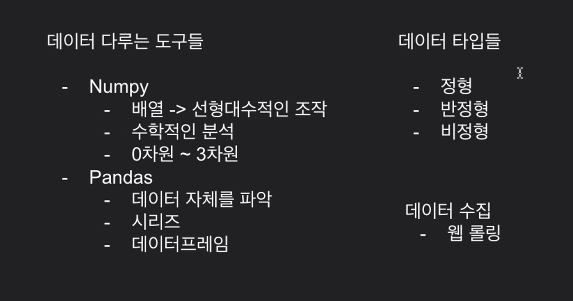

# EDA(Exploratory Data Analysis) 탐색적 데이터 분석

- 탐색적 자료 분석
- 데이터 분석 이전 그래프나 통계적 분석을 통해 데이터를 직관적으로 이해 
- 데이터 자체가 가지고 있는 그대로의 의미를 파악 
- 목적 
    - 데이터 수집 의사 결정
    - 데이터에 맞는 모델 선정
    - 변수들 간 관계 파악
- 순서
    - 데이터 가져오기(모듈 세팅)
    - 데이터 정보 확인
    - 데이터 전처리 
        - 결측치 
        - 이상치
    - 데이터 시각화 


# 성적 데이터

## 1. 데이터 가져오기(모듈세팅)


In [1]:
import pandas as pd

In [3]:
out_df = pd.read_excel('outlier.xlsx')

## 2. 정보 확인

In [4]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [5]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [7]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [8]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [10]:
out_df.set_index('번호')

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [11]:
out_df 

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [12]:
# replace
# 데이터 변경 
out_df['국어'] = out_df['국어'].replace(-57,57)

In [13]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,57,48,67
9,10,100,87,93


In [203]:
# 1. 학생들의 국어(수학, 영어) 성적평균
out_df.mean

번호     5.5
국어    71.6
수학    77.3
영어    62.0
dtype: float64

In [205]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,71.600000,77.300000,62.00000
std,3.02765,20.646226,29.616249,29.06315
min,1.00000,32.000000,24.000000,21.00000
25%,3.25000,59.750000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,86.250000,99.250000,87.00000
max,10.00000,100.000000,120.000000,100.00000


In [207]:
 #과목별 최대 \최소

out_df.min()

번호     1
국어    32
수학    24
영어    21
dtype: int64

In [208]:
out_df.max()

번호     10
국어    100
수학    120
영어    100
dtype: int64

In [209]:
# 순서대로 -> 사분위값 -> 상위 몇 %

q1 = out_df.quantile(0.25)
q1

번호     3.25
국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64

In [212]:
q2 = out_df.quantile(0.5)
q3 = out_df.quantile(0.75)
print(q2)
print(q3)

번호     5.5
국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64
번호     7.75
국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64


In [214]:
#IQR : q3-q1 -> 50%에 해당하는 데이터
# 일반적인 데이터 허용범위. 이 범위를 벗어나면 이상치(outlier)

IQR = q3-q1
IQR

번호     4.50
국어    26.50
수학    45.00
영어    51.75
dtype: float64

In [220]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


In [219]:
# 인덱싱

out_df = out_df.set_index('번호')

<BarContainer object of 3 artists>

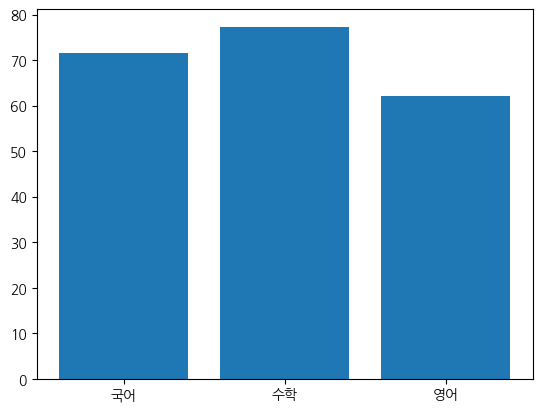

In [221]:
# 평균
m = out_df.mean()

plt.bar(m.index,m)

In [ ]:
#### 이상치 확인하기 

- 이상치(outlier) : 사분위에서 특정 범위(+- IQR*1.5)를 초과하는 경우

In [15]:
import matplotlib as plt

In [18]:
import matplotlib.pyplot as plt

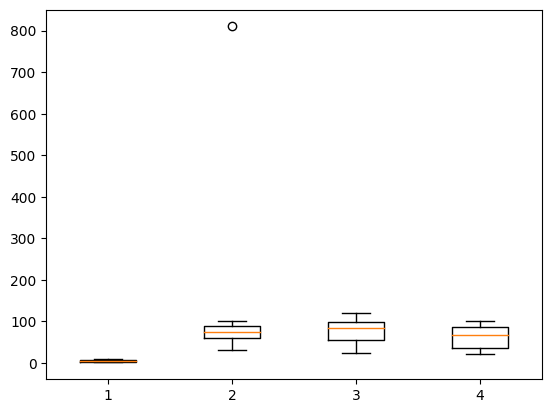

In [19]:
# 이상치 확인 -> boxplot

plt.boxplot(out_df)
plt.show()

In [21]:
out_df['국어'] = out_df['국어'].replace(810,81)
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,81,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,57,48,67
9,10,100,87,93


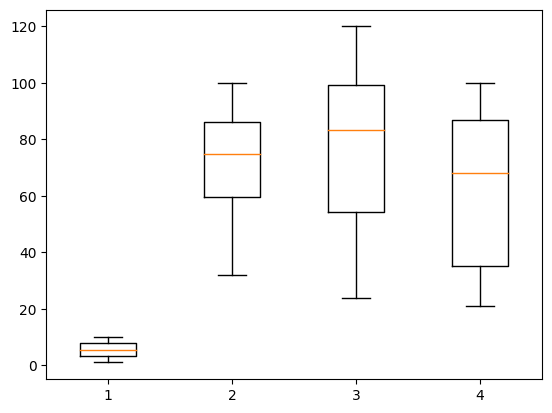

In [22]:
plt.boxplot(out_df)
plt.show()

# 날씨 데이터 

## 1. 데이터 불러오기

In [27]:
weather_df = pd.read_csv('weather.csv',encoding='cp949')

## 2. 데이터 정보확인 

In [28]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [29]:
weatehr_df.tail

<bound method NDFrame.tail of              일시  최저기온(°C)  최고기온(°C)  일강수량(mm)  최대 순간 풍속(m/s)  평균 풍속(m/s)  \
0      2010.1.1      -1.7       5.0       0.0           13.3         3.4   
1      2010.1.2      -0.4      13.2       0.0           17.0         5.1   
2      2010.1.3      -0.1       7.5       0.0           14.5         5.4   
3      2010.1.4       1.0      11.5       1.0           22.4         5.2   
4      2010.1.5      -2.1       1.7       0.0           19.1         7.1   
..          ...       ...       ...       ...            ...         ...   
360  2010.12.27      -0.1       6.7       0.0           20.3         3.8   
361  2010.12.28       1.0       8.8       0.0           15.5         5.2   
362  2010.12.29      -0.5       5.9       0.5           19.1         4.4   
363  2010.12.30      -4.4       5.1       5.5           18.8         5.8   
364  2010.12.31      -4.4      -1.0      15.0           19.2         6.3   

     최대 순간 풍속 풍향(hhmi)  
0                334.7  
1      

In [30]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


### 컬럼으로 인덱스 설정

In [31]:
weather_df = weatehr_df.set_index('일시')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


### 인덱스 datime 변환

In [58]:
#pd.to_datetime

weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [34]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2010.1.1 to 2010.12.31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0+ KB


### 결측지 확인 - 컬럼별

In [35]:
# 결측치 컬럼별 개수 확인
weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [39]:
weather_df.isna()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,False,False,False,False,False,False
2010.1.2,False,False,False,False,False,False
2010.1.3,False,False,False,False,False,False
2010.1.4,False,False,False,False,False,False
2010.1.5,False,False,False,False,False,False
...,...,...,...,...,...,...
2010.12.27,False,False,False,False,False,False
2010.12.28,False,False,False,False,False,False
2010.12.29,False,False,False,False,False,False


In [38]:
# boolean -> boolean indexing 
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
Name: 최저기온(°C), dtype: float64

In [40]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
Name: 최고기온(°C), dtype: float64

In [41]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
Name: 일강수량(mm), dtype: float64

In [42]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [43]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010.12.7    NaN
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
2010.12.14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [44]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010.12.8    NaN
2010.12.9    NaN
2010.12.10   NaN
2010.12.11   NaN
2010.12.12   NaN
2010.12.13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [ ]:
'''
평균풍속 : 12월 7일 ~ 14일
나머지 : 12 월 8일 ~ 13일
'''

###결측값 확인 - 날짜

In [60]:
# 날짜 -> 12월 -> 결측
# loc 함수 : 앞뒤값 포함 

weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


## 결측치 처리하기 

In [50]:
# 시간 흐름에 따른 데이터 -> 시계열
# 시간이 비어 있을 때 빈 값 앞뒤로 데이터 파악

In [62]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


### 일 강수량 결측치를 0으로 채워주기 


In [64]:
#fillna(숫자)

weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
weather_df['일강수량(mm)'].isna().sum()

0

In [65]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN


In [69]:
weather_df.loc['2010-12-05':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,5.000000,5.000000,11.0,5.000000,3.000000,5.000000
mean,0.220000,6.760000,0.0,20.960000,6.400000,227.720000
std,2.200454,6.123153,0.0,7.358872,2.910326,137.437648
min,-2.900000,2.000000,0.0,8.400000,3.100000,14.100000
25%,-0.800000,2.000000,0.0,20.600000,5.300000,165.800000
50%,0.400000,2.900000,0.0,24.500000,7.500000,300.800000
75%,1.600000,13.100000,0.0,24.600000,8.050000,317.700000
max,2.800000,13.800000,0.0,26.700000,8.600000,340.200000


### 결측값을 사분위로 채우기 

In [70]:
# 최저기온, 최고기온 결측값 사분위값 50으로 채우기

weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)

In [73]:
weather_df.loc['2010-12-05':'2010-12-15']['최저기온(°C)']

일시
2010-12-05    2.8
2010-12-06    1.6
2010-12-07    0.4
2010-12-08    0.4
2010-12-09    0.4
2010-12-10    0.4
2010-12-11    0.4
2010-12-12    0.4
2010-12-13    0.4
2010-12-14   -0.8
2010-12-15   -2.9
Name: 최저기온(°C), dtype: float64

In [74]:
weather_df.loc['2010-12-05':'2010-12-15']['최고기온(°C)']

일시
2010-12-05    13.8
2010-12-06    13.1
2010-12-07     2.0
2010-12-08     2.9
2010-12-09     2.9
2010-12-10     2.9
2010-12-11     2.9
2010-12-12     2.9
2010-12-13     2.9
2010-12-14     2.9
2010-12-15     2.0
Name: 최고기온(°C), dtype: float64

In [75]:
# 풍속
weather_df.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [80]:
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.55)
weather_df.loc['2010-12-06':'2010-12-15']['최대 순간 풍속(m/s)']

일시
2010-12-06    24.60
2010-12-07    20.60
2010-12-08    24.55
2010-12-09    24.55
2010-12-10    24.55
2010-12-11    24.55
2010-12-12    24.55
2010-12-13    24.55
2010-12-14    26.70
2010-12-15    24.50
Name: 최대 순간 풍속(m/s), dtype: float64

In [81]:
# 평균풍속

weather_df.loc['2010-12-04':'2010-12-18'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,15.000000,15.000000,15.000000,15.000000,7.000000,9.000000
mean,-0.100000,5.333333,0.333333,19.880000,4.642857,223.388889
std,1.520338,4.349494,1.290994,6.806662,2.359984,121.731020
min,-3.200000,1.300000,0.000000,8.300000,2.900000,14.100000
25%,-0.650000,2.900000,0.000000,13.000000,3.250000,165.800000
50%,0.400000,2.900000,0.000000,24.550000,3.400000,284.100000
75%,0.400000,8.100000,0.000000,24.550000,5.550000,300.800000
max,2.800000,13.800000,5.000000,26.700000,8.600000,340.200000


In [82]:
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)
weather_df.loc['2010-12-06':'2010-12-15']['평균 풍속(m/s)']

일시
2010-12-06    8.600000
2010-12-07    4.642857
2010-12-08    4.642857
2010-12-09    4.642857
2010-12-10    4.642857
2010-12-11    4.642857
2010-12-12    4.642857
2010-12-13    4.642857
2010-12-14    4.642857
2010-12-15    7.500000
Name: 평균 풍속(m/s), dtype: float64

In [83]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.30,3.100000,25.2
2010-12-02,6.2,12.2,7.5,9.40,3.900000,14.1
2010-12-03,2.0,11.4,0.0,18.40,5.200000,50.5
2010-12-04,-0.5,11.3,0.0,8.30,2.900000,39.4
2010-12-05,2.8,13.8,0.0,8.40,3.100000,165.8
2010-12-06,1.6,13.1,0.0,24.60,8.600000,14.1
2010-12-07,0.4,2.0,0.0,20.60,4.642857,340.2
2010-12-08,0.4,2.9,0.0,24.55,4.642857,NaN
2010-12-09,0.4,2.9,0.0,24.55,4.642857,NaN


In [86]:
# 풍향

weather_df.loc['2010-12-07':'2010-12-17'].describe()


,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.245455,4.694805,305.380000
std,1.389114,1.475189,1.507557,4.898288,1.037585,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.550000,4.642857,284.100000
50%,0.400000,2.900000,0.000000,24.550000,4.642857,300.800000
75%,0.400000,2.900000,0.000000,24.550000,4.642857,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [87]:
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.38)
weather_df.loc['2010-12-06':'2010-12-15']['최대 순간 풍속 풍향(hhmi)']

일시
2010-12-06     14.10
2010-12-07    340.20
2010-12-08    305.38
2010-12-09    305.38
2010-12-10    305.38
2010-12-11    305.38
2010-12-12    305.38
2010-12-13    305.38
2010-12-14    300.80
2010-12-15    317.70
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [88]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


## 데이터 시각화 

### 한글 출력 라이브러리

In [90]:
# 한글 출력을 위한 추가 라이브러리

!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.5 MB/s eta 0:00:00


In [92]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 기본 데이터 출력 

In [93]:
#  시간 순서
x = weather_df.index 
# 최저기온
y1 = weather_df['최저기온(°C)']

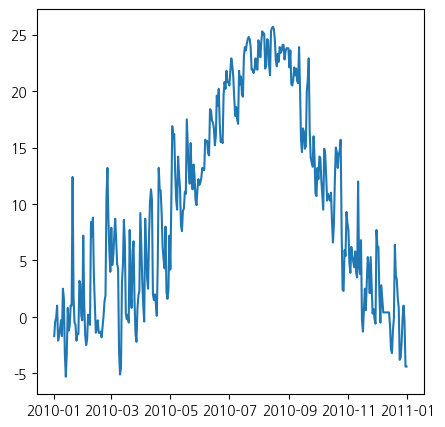

In [98]:
# 하나의 셀 안에 어떻게 출력할지

# 그래프 사이즈 - figure(figsize)

plt.figure(figsize = (5,5))

# 그래프 그리기 - plot
plt.plot(x,y1)
plt.show()

In [99]:
x = weather_df.index 

y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']


### 여러 그래프 출력(subplot)

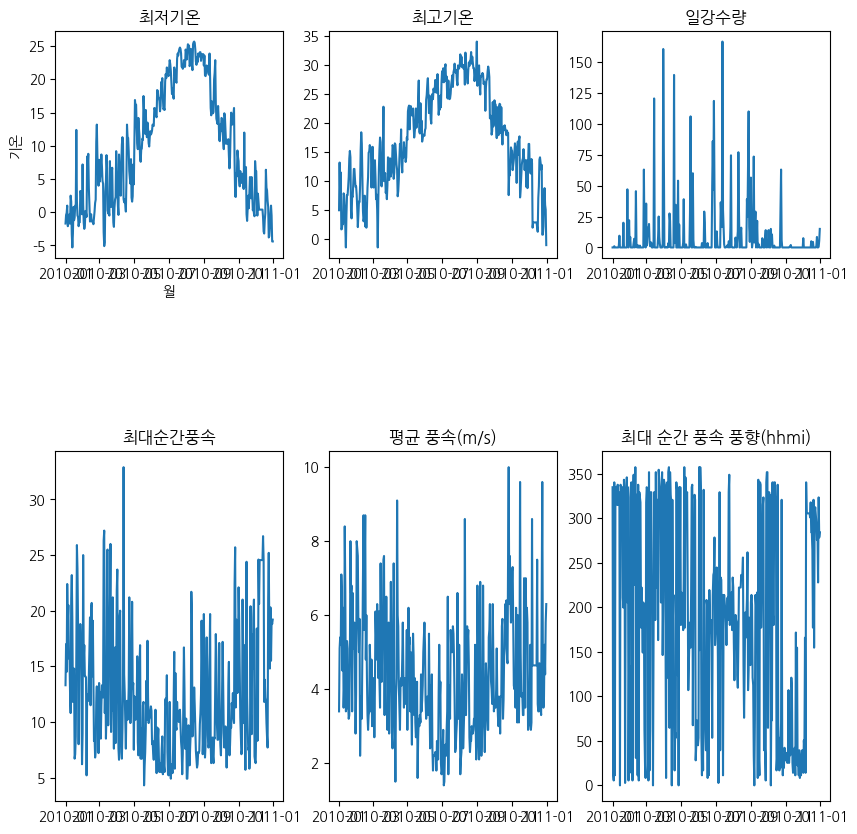

In [117]:
# subplot

plt.figure(figsize = (10,10))

#plt.subplot(행, 열, 인덱스)

plt.subplot(3, 3, 1)
plt.title('최저기온')
plt.plot(x,y1)
plt.xlabel('월')
plt.ylabel('기온')

plt.subplot(3,3,2)
plt.title('최고기온')
plt.plot(x,y2)

plt.subplot(3,3,3)
plt.title('일강수량')
plt.plot(x,y3)


plt.subplot(2,3,4)
plt.title('최대순간풍속')
plt.plot(x,y4)

plt.subplot(2,3,5)
plt.title('평균 풍속(m/s)')
plt.plot(x,y5)

plt.subplot(2,3,6)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.plot(x,y6)

plt.show()

In [ ]:
# groupby : 기준 데이터 -> (처리할)수치 데이터 
# 월 별 / 기온, 풍속 ... 

In [118]:
weather_df.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='일시', length=365, freq=None)

In [121]:
weather_date = pd.Series(weather_df.index)
weather_date

0     2010-01-01
1     2010-01-02
2     2010-01-03
3     2010-01-04
4     2010-01-05
         ...    
360   2010-12-27
361   2010-12-28
362   2010-12-29
363   2010-12-30
364   2010-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [122]:
weather_date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: 일시, Length: 365, dtype: int64

In [124]:
weather_df['월'] = weather_date.dt.month.values
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


### group by 를 이용한 그래프 출력

In [136]:
# group by(기준 데이터)[특정데이터 값가져오기]
month_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()
month_1_low_temp = weather_df.groupby(weather_df['월']== 1)['최저기온(°C)'].mean()

In [137]:
month_1_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()
month_1_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()
month_1_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()
month_1_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()
month_1_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [145]:
x_month = weather_df['월'].unique()
x_month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

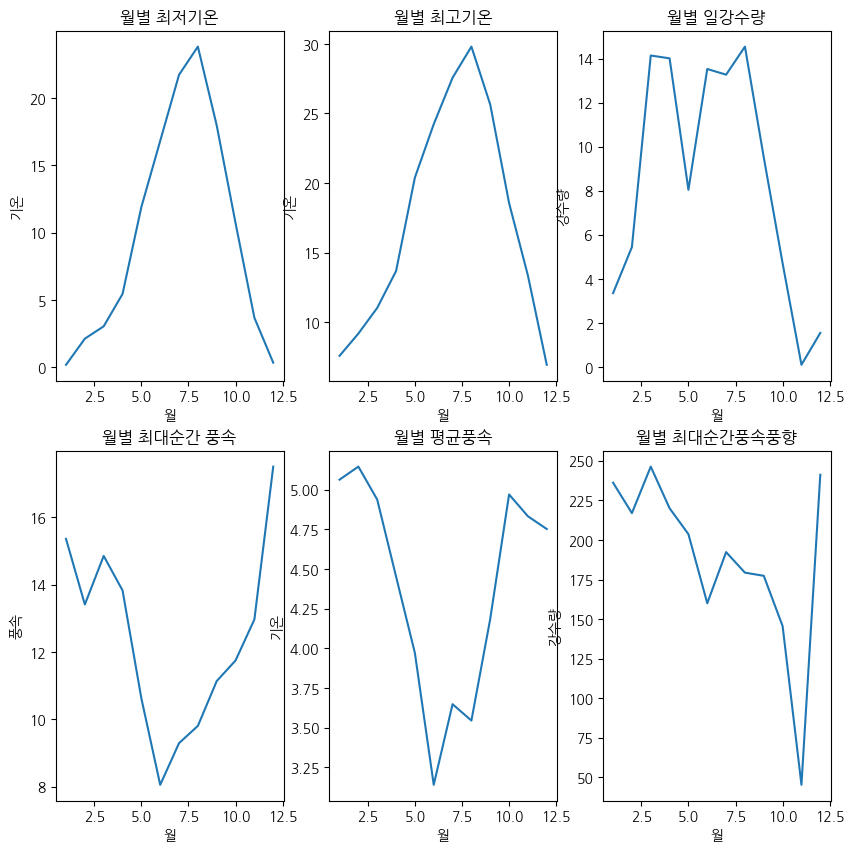

In [155]:
# 그룹바이 월별데이터 -> 1월 데이터들 -> 그ㅐㄹ프
plt.figure(figsize=(10,10))

#
plt.subplot(2,3,1)
plt.title('월별 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low_temp)

plt.subplot(2,3,2)
plt.title('월별 최고기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(month_1_high_temp)

plt.subplot(2,3,3)
plt.title('월별 일강수량')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month, month_1_daily_vol)

plt.subplot(2,3,4)
plt.title('월별 최대순간 풍속')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_1_wind_speed)

plt.subplot(2,3,5)
plt.title('월별 평균풍속')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month,month_1_wind_mean)

plt.subplot(2,3,6)
plt.title('월별 최대순간풍속풍향')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month,month_1_wind_dic)

### 하나의 그래프에 여러 변수 추가 

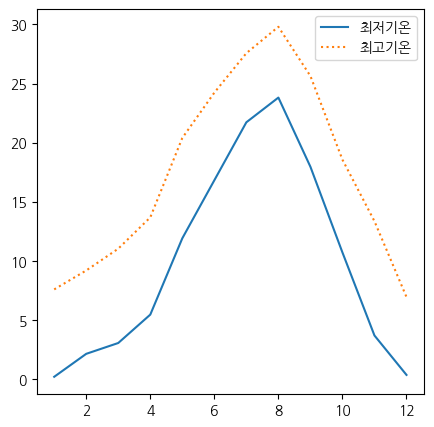

In [161]:
# 하나의 그래프에 두가지표현
plt.figure(figsize=(5,5))


plt.plot(x_month, month_low_temp, label= '최저기온')
plt.plot(x_month,month_1_high_temp,':',label = '최고기온')
plt.legend(loc = 'upper right')

# 색상 
# 선모양
# 범례 

<BarContainer object of 12 artists>

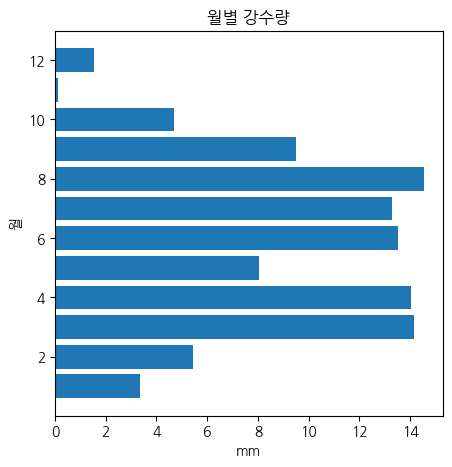

In [170]:
# 일 강수량 바 그래프 -> 데이터 타입에 따라 적절한 그래프 선택하기 
# bar(x,y)  barh(y,x)
 
plt.figure(figsize=(5,5))
plt.title('월별 강수량')
plt.ylabel('월')
plt.xlabel('mm')
plt.barh(x_month, month_1_daily_vol)


### 1월 데이터 시각화 

In [ ]:
# 인덱스 -> 월 -> 1월 데이터만 뽑아온다 -> 314ㅐ의 데이터
# 1일 데이터 -> 31개

# 인덱스 1월 해당(조건) -> 일별 날짜 : ok

# group by : 기준 -> 범위를 나눠서 수치를 분석
# 1월 데이터


In [173]:
#1. 1월 데이터
month_1 = weather_df[weather_df['월']==1]

In [175]:
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


In [176]:
month_1.tail()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-27,3.2,12.1,47.0,18.8,5.3,205.3,1
2010-01-28,2.9,12.1,0.5,17.2,5.8,334.7,1
2010-01-29,0.1,10.3,0.0,12.2,4.4,5.5,1
2010-01-30,-0.3,9.0,22.0,6.2,2.8,135.0,1
2010-01-31,7.2,9.1,2.5,9.0,3.9,14.1,1


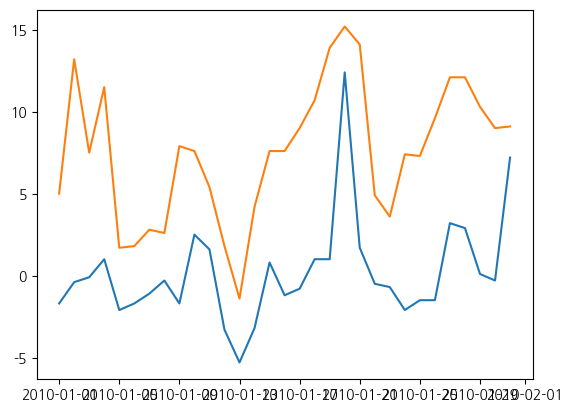

In [180]:

plt.plot(month_1['최저기온(°C)'])
plt.plot(month_1['최고기온(°C)'])
plt.show()

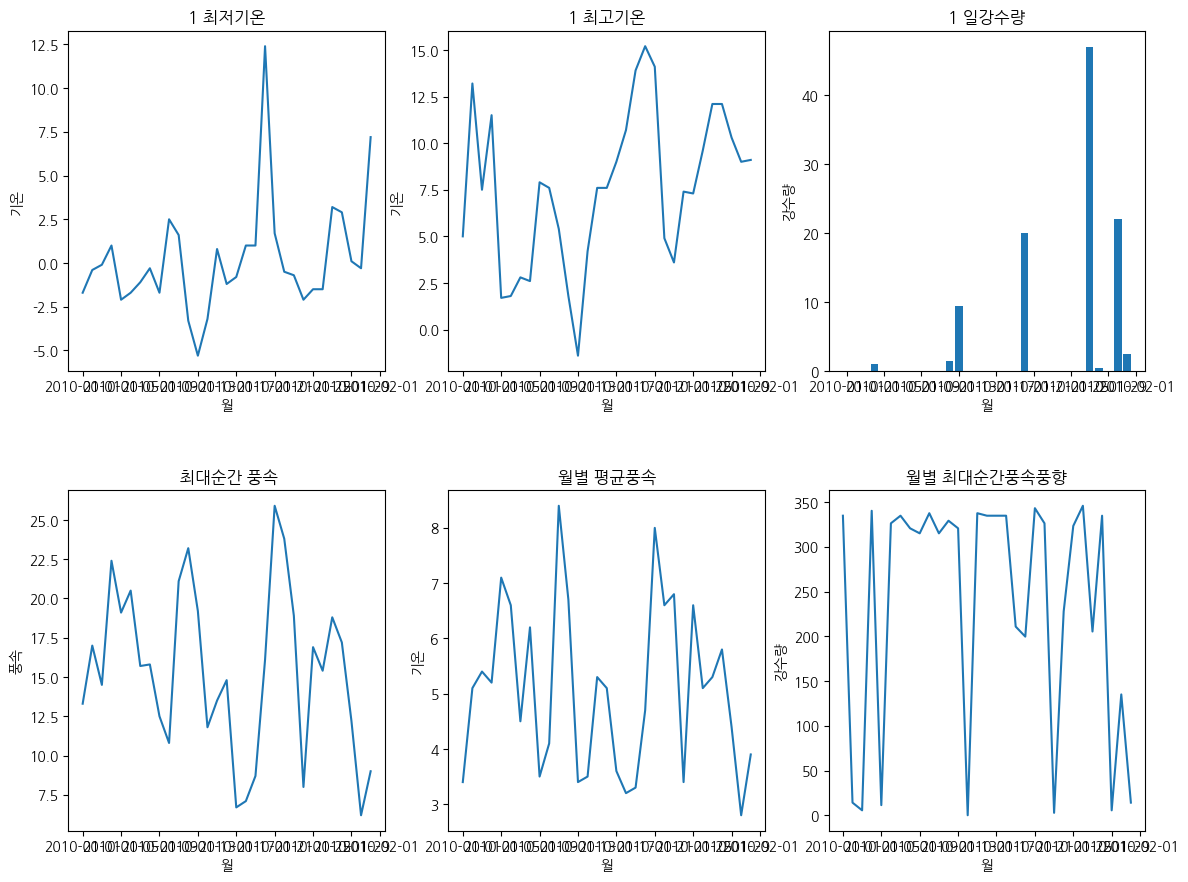

In [199]:
# 1월 데이터를 subplot 2x3. 강수량은 바

plt.figure(figsize=(10,10))

plt.subplots_adjust(left=0.123, bottom=0.1, right=1.2, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(2,3,1)
plt.title('1 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(month_1['최저기온(°C)'])

plt.subplot(2,3,2)
plt.title('1 최고기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(month_1['최고기온(°C)'])

plt.subplot(2,3,3)
plt.title('1 일강수량')
plt.ylabel('강수량')
plt.xlabel('월')
plt.bar(month_1.index, month_1['일강수량(mm)'])

plt.subplot(2,3,4)
plt.title(' 최대순간 풍속')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(month_1['최대 순간 풍속(m/s)'])

plt.subplot(2,3,5)
plt.title('월별 평균풍속')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(month_1['평균 풍속(m/s)'])

plt.subplot(2,3,6)
plt.title('월별 최대순간풍속풍향')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(month_1['최대 순간 풍속 풍향(hhmi)'])
plt.show()

# 제주도 음식점 데이터 

## 데이터 가져오기(모듈세팅)

In [224]:
food = pd.read_excel('jeju_food.xlsx')

## 데이터 정보 확인

In [226]:
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [227]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


In [228]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [229]:
food.describe( )

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [230]:
food.isna().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

## 데이터 전처리

### 컬럼 삭제(drop)

In [231]:
# 광역시/도 컬럼 삭제

food = food.drop('광역시/도',axis = 1 )
food

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [232]:
food['중분류 카테고리'].unique()

array(['음식'], dtype=object)

In [233]:
food = food.drop('중분류 카테고리', axis=1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


### 컬럼 데이터 확인

In [234]:
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [235]:
food['소분류 카테고리'].unique()

array(['한식', '간이음식', '카페/찻집', '음식점기타', '전문음식', '외국식'], dtype=object)

In [236]:
food['시/군/구'].value_counts()

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

### 컬럼 인덱스 설정

In [237]:
# 내부 컬럼을 인덱스로
food = food.set_index('순위')
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


### 컬럼 특정값 추출

In [243]:
# food
food['소분류 카테고리'][food['소분류 카테고리'] == '한식']

순위
1      한식
4      한식
8      한식
11     한식
12     한식
       ..
488    한식
493    한식
495    한식
498    한식
500    한식
Name: 소분류 카테고리, Length: 210, dtype: object

In [244]:
food[food['소분류 카테고리']=='한식']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [245]:
food[food['소분류 카테고리']=='카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [246]:
food[food['소분류 카테고리']=='한식'].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


### 특정 값을 포함한 순위 찾기(str.contains)

In [247]:
# .str.contains('keyword')

# 제주도내 스타벅스의 순위를 찾아보기

food[food['관광지명'].str.contains('스타벅스')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [250]:
cafe = food[food['소분류 카테고리']=='카페/찻집'].head(10)
cafe[cafe['관광지명'].str.contains('스타벅스')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813


In [251]:
food[food['관광지명'].str.contains('국수')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711


In [260]:
kr = food[food['소분류 카테고리']=='한식']
kr

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [263]:
kr[kr['관광지명'].str.contains('국수')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711


### pie graph

In [267]:
# pie graph
# plt.pie(비율, 레이블 )

In [282]:
pie = food['소분류 카테고리'].value_counts()
pie

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [ ]:
# list 값에 대한 계산을 할때는 리스트 컴프리핸션 이용하는 걸 권장
# 순회 가능한 계산이 필요할 때 -> 리스트 컴프리핸션 
# 비율로 변경
pie_p = [pie.values[0]]

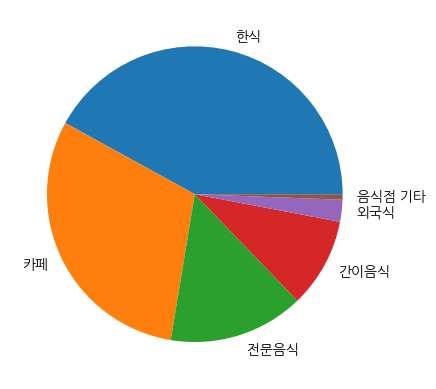

In [286]:
label = ['한식', '카페',' 전문음식','간이음식','외국식','음식점 기타']
plt.pie(pie, labels = label )
plt.show()